<a href="https://colab.research.google.com/github/satnadevi/Car-Price-Prediction/blob/main/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONVOLUTIONAL NEURAL NETWORK (CNN) IMAGE CLASSIFIER USING TENSOR FLOW**

**Name : Satna Listiya Devi**

**Email : satna254@gmail.com**

**Addres : Kedungbule RT 14 Trimurti Srandakan Bantul Yogyakarta 55762**

**Datasets: https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip**

## **Import Library**

In [59]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy
#from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os

print(tf.__version__)

2.5.0


## **Loading Datasets**

Downloading Datasets

In [60]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip\
  -O /tmp/rockpaperscissors.zip

--2021-06-21 10:22:44--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  29.3MB/s    in 11s     

2021-06-21 10:22:56 (27.5 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Extracting File

In [61]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'rps-cv-images')

Checking Directory

In [62]:
os.listdir('/tmp/rockpaperscissors')

['README_rpc-cv-images.txt', 'rock', 'rps-cv-images', 'paper', 'scissors']

In [63]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']

## **Data Preprocessing**

Set Image Augmentation and Splitting Data for Validation

In [64]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    shear_range = 0.2,
    rotation_range = 20,
    horizontal_flip = True,
    validation_split = 0.4)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    shear_range = 0.2,
    rotation_range = 20,
    horizontal_flip = True,
    validation_split = 0.4)

Prepare Training and Validation Data for Model

In [65]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 4,
    class_mode = 'categorical',
    subset = 'training')

validation_generator = validation_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 4,
    class_mode = 'categorical',
    subset = 'validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


## **Learning**

Making CNN Architecture

In [66]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')])

Calling `compile` Function, Defining `loss`, and `optimizer`

In [67]:
model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.RMSprop(),
    metrics = ['accuracy'])

Training Model with `model.fit`

In [69]:
model.fit(
    train_generator, 
    epochs = 12,
    validation_data = validation_generator, 
    shuffle = True,
    verbose = 1)

Epoch 1/12
329/329 [==============================] - 120s 364ms/step - loss: 1.0051 - accuracy: 0.7149 - val_loss: 0.6835 - val_accuracy: 0.8268
Epoch 2/12
329/329 [==============================] - 119s 361ms/step - loss: 0.4674 - accuracy: 0.8848 - val_loss: 0.2739 - val_accuracy: 0.9329
Epoch 3/12
329/329 [==============================] - 119s 362ms/step - loss: 0.2763 - accuracy: 0.9417 - val_loss: 0.1286 - val_accuracy: 0.9733
Epoch 4/12
329/329 [==============================] - 118s 360ms/step - loss: 0.2354 - accuracy: 0.9587 - val_loss: 0.1585 - val_accuracy: 0.9722
Epoch 5/12
329/329 [==============================] - 118s 358ms/step - loss: 0.2513 - accuracy: 0.9531 - val_loss: 0.2128 - val_accuracy: 0.9519
Epoch 6/12
329/329 [==============================] - 118s 358ms/step - loss: 0.2082 - accuracy: 0.9635 - val_loss: 0.2012 - val_accuracy: 0.9695
Epoch 7/12
329/329 [==============================] - 117s 356ms/step - loss: 0.2011 - accuracy: 0.9642 - val_loss: 0.2319 -

## **Predicting**

Saving 0eqArS2GgsBeqgSn.png to 0eqArS2GgsBeqgSn (2).png


Predict Result
0eqArS2GgsBeqgSn.png
[[1. 0. 0.]]
PAPER


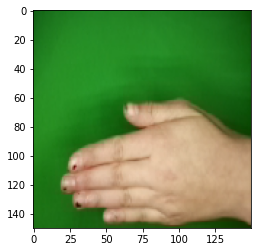

In [71]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
for jwb in uploaded.keys():
  path = jwb
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  #Result template
  paper    = "[[1. 0. 0.]]"
  rock     = "[[0. 1. 0.]]"
  scissors = "[[0. 0. 1.]]"

  result = np.array_str(classes)

  print('\n')
  print('Predict Result')
  print(jwb)
  print(result)

  #Result in Human Language
  if result == paper:
     print("PAPER")
  elif result == rock:
     print("ROCK")
  elif result == scissors:
     print("SCISSORS")
  else :
     print("[[%PAPER. %ROCK. %SCISSORS]]")